**Part One** : Using tensorflow

In [ ]:
#importing libreries
import numpy as np
import tensorflow
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Picture 0 refers to number 5
Picture 1 refers to number 0
Picture 2 refers to number 4
Picture 3 refers to number 1
Picture 4 refers to number 9
Picture 5 refers to number 2
Picture 6 refers to number 1
Picture 7 refers to number 3
Picture 8 refers to number 1


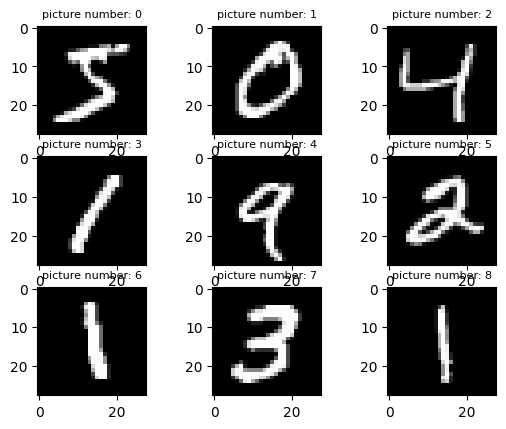

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(3, 3, i+1)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 print(f'Picture {i} refers to number {y_train[i]}')
 plt.title(f"picture number: {i}",fontsize=8)

# show the figure
plt.show()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
#rescale our data: from 0=>255 to 0=>1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#importing the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
mnist_numbers_encoder = OneHotEncoder()
y_train = mnist_numbers_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test= mnist_numbers_encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
print('One-hot encoded:')
print(y_train[:5])

One-hot encoded:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
#define the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))      #sinon on met dinamiquement the shape ouf the input with : input_shape=X_train.shape[1:]
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#summarize the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,690 (655.04 KB)

 Trainable params: 167,690 (655.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the model
training_set = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8115 - loss: 0.6300 - val_accuracy: 0.9537 - val_loss: 0.1479
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9539 - loss: 0.1507 - val_accuracy: 0.9666 - val_loss: 0.1024
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1099 - val_accuracy: 0.9719 - val_loss: 0.0895
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0858 - val_accuracy: 0.9751 - val_loss: 0.0787
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0774 - val_accuracy: 0.9758 - val_loss: 0.0800
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9793 - loss: 0.0644 - val_accuracy: 0.9774 - val_loss: 0.0732
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0556 - val_accuracy: 0.9764 - val_loss: 0.0815
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 0.0575 - val_accuracy: 0

In [ ]:
#Evaluation
results = model.evaluate(X_test, y_test)
print(f'final test loss: {results[0] * 100} %')
print(f'final test accuracy: {results[1] * 100} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0851
final test loss: 7.214964181184769 %
final test accuracy: 97.93000221252441 %


In [ ]:
#Test the model
predictions = model.predict(X_test)

#Print all probabilities for the first 5 samples
for i in range(10):
    print(f"Sample {i}:")
    #print(f"Probabilities: {predictions[i]}")  # Probabilities for all classes
    print(f"Predicted Label: {predictions[i].argmax()}, Actual Label: {y_test[i]}") #Highest probability => final prediction
    if predictions[i].argmax() == y_test[i].argmax():
        print("Correct prediction")
    else:
        print("Wrong prediction")
    print("-----")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Sample 0:
Predicted Label: 7, Actual Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Correct prediction
-----
Sample 1:
Predicted Label: 2, Actual Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Correct prediction
-----
Sample 2:
Predicted Label: 1, Actual Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Correct prediction
-----
Sample 3:
Predicted Label: 0, Actual Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Correct prediction
-----
Sample 4:
Predicted Label: 4, Actual Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Correct prediction
-----
Sample 5:
Predicted Label: 1, Actual Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Correct prediction
-----
Sample 6:
Predicted Label: 4, Actual Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Correct prediction
-----
Sample 7:
Predicted Label: 9, Actual Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Correct prediction
-----
Sample 8:
Predicted Label: 5, Actual Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Correct prediction
-----
Sample 9:
Predicted Label: 9, Actual Label: [0. 0.

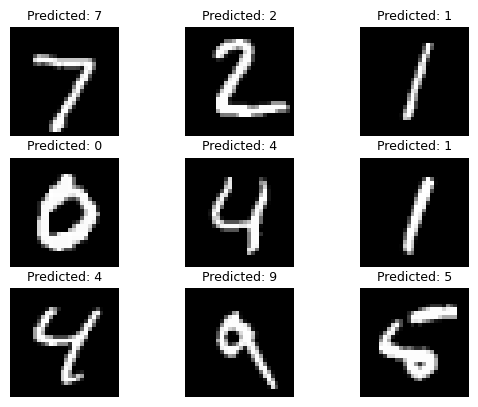

In [ ]:
# Plot few test images with predictions
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}", fontsize=9)
    plt.axis('off')
plt.show()


**Part Two** : Using Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Load the MNIST dataset
transform = transforms.ToTensor()  # Convert images to tensors
#choosing the training set and the testing set
train_data = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='data', train=False, transform=transform, download=True)

In [ ]:
# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True) # shuffle=True => randomizes the order of the training data for each epoch
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
#define the Neural Network Model
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.flatten = nn.Flatten()  #flatten the input from 28x28 to 784
        self.fc1 = nn.Linear(28 * 28, 128)  #layer 1 (input: 784, output: 128)
        self.dropout1 = nn.Dropout(0.2)  #dropout on layer 1 with 20% probability
        self.fc2 = nn.Linear(128, 256)  #layer 2 (128 -> 256)
        self.fc3 = nn.Linear(256, 128)  #layer 3 (256 -> 128)
        self.fc4 = nn.Linear(128, 10)  #output layer (128 -> 10 for 10 classes)
        self.relu = nn.ReLU()  #ReLU activation function
        self.softmax = nn.Softmax(dim=1)  #Softmax activation for probabilities

    def forward(self, x):
        x = self.flatten(x)  #flatten the input
        x = self.fc1(x)  #fully connected layer 1
        x = self.relu(x)  #ReLU activation
        x = self.dropout1(x)  #dropout
        x = self.fc2(x)  #fully connected layer 2
        x = self.relu(x)  #ReLU activation
        x = self.fc3(x)  #fully connected layer 3
        x = self.relu(x)  #ReLU activation
        x = self.fc4(x)  #output layer
        return self.softmax(x)  #Softmax for probabilities


In [ ]:
model = MNISTModel()

In [ ]:
#Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Train the Model
epochs = 10
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Zero the gradient buffers
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 1.6313000236238753
Epoch 2/10, Loss: 1.5286123861890357
Epoch 3/10, Loss: 1.51715678955192
Epoch 4/10, Loss: 1.512421113341602
Epoch 5/10, Loss: 1.5085773717111617
Epoch 6/10, Loss: 1.5057400157456713
Epoch 7/10, Loss: 1.503367942787691
Epoch 8/10, Loss: 1.5028916058509842
Epoch 9/10, Loss: 1.5027670143509724
Epoch 10/10, Loss: 1.5027730041729617


In [ ]:
#evaluate the Model
model.eval()  #set the model to evaluation mode

#get predictions for the test set and initialise the loss
total_loss = 0.0
predictions = []
actuals = []

#the loss function
criterion = nn.CrossEntropyLoss()

with torch.no_grad():  #disable gradient calculations for testing
    for images, labels in test_loader:
        outputs = model(images)  #forward pass

        #compute the loss for the current batch
        loss = criterion(outputs, labels)
        total_loss += loss.item()  #accumulate loss

        # Get predictions
        probabilities = torch.softmax(outputs, dim=1)  #convert to probabilities
        predicted_labels = probabilities.argmax(dim=1)  #get the index of the highest probability

        #store predictions and labels
        predictions.extend(predicted_labels.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

#calculate the average test loss
average_test_loss = total_loss / len(test_loader)

#print test loss
print(f"Test Loss: {average_test_loss:.4f}")

"""NB: i wanted to check the loss because i felt that it's too hight compared to the value that i got when i used tensorflow, but after looking on google
that if the loss value in the train set is close to the one in the test set, than it's fine
else it's either underfitting or overfitting. """

Test Loss: 1.5017


In [ ]:
#Print the probabilities and compare predictions for the first 10 samples
print("First 10 Predictions:")
for i in range(10):
    print(f"Sample {i}:")
    print(f"Predicted Label: {predictions[i]}, Actual Label: {actuals[i]}")
    if predictions[i] == actuals[i]:
        print("Correct prediction")
    else:
        print("Wrong prediction")
    print("-----")


First 10 Predictions:
Sample 0:
Predicted Label: 7, Actual Label: 7
Correct prediction
-----
Sample 1:
Predicted Label: 2, Actual Label: 2
Correct prediction
-----
Sample 2:
Predicted Label: 1, Actual Label: 1
Correct prediction
-----
Sample 3:
Predicted Label: 0, Actual Label: 0
Correct prediction
-----
Sample 4:
Predicted Label: 4, Actual Label: 4
Correct prediction
-----
Sample 5:
Predicted Label: 1, Actual Label: 1
Correct prediction
-----
Sample 6:
Predicted Label: 4, Actual Label: 4
Correct prediction
-----
Sample 7:
Predicted Label: 9, Actual Label: 9
Correct prediction
-----
Sample 8:
Predicted Label: 6, Actual Label: 5
Wrong prediction
-----
Sample 9:
Predicted Label: 9, Actual Label: 9
Correct prediction
-----


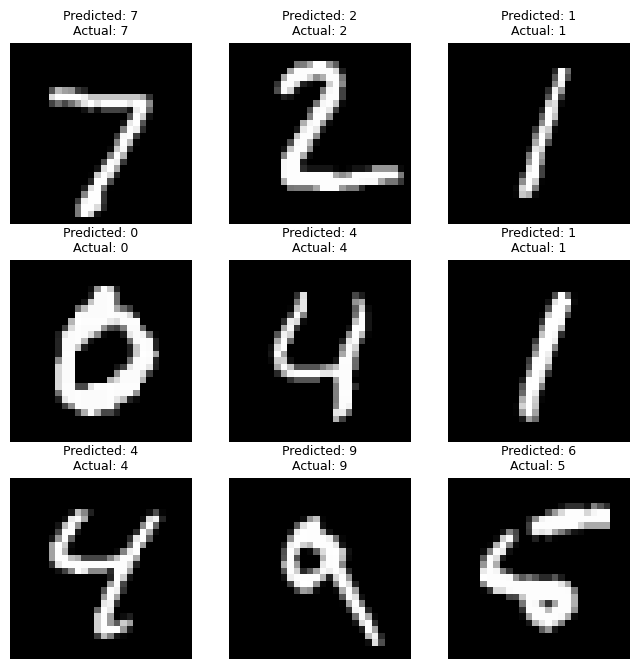

In [ ]:
#Visualize few test images with predictions
plt.figure(figsize=(8, 8))
for i in range(9):
    image, label = test_data[i]  #get image and label from the dataset
    image = image.squeeze(0)  #remove the channel dimension (from 1x28x28 to 28x28)

    #get the model prediction
    with torch.no_grad():
        output = model(image.unsqueeze(0))  #add batch dimension (1x1x28x28)
        predicted_label = output.argmax(dim=1).item()  #get predicted class (highest proba)

    #plot the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {label}", fontsize=9)
    plt.axis('off')

plt.show()
